<a href="https://colab.research.google.com/github/ArunK-ML/Project---TripFare-Predicting-Urban-Taxi-Fare-with-Machine-Learning/blob/main/TripFare_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚗 **TripFare : Predicting Urban Taxi Fare with Machine Learning**

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Collection

df = pd.read_csv("/content/drive/MyDrive/DataSet_For DS/taxi_fare.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [102]:
df.shape

(212345, 18)

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

# ** Preprocessing**

In [104]:
# Change dtype

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'], format='%Y-%m-%d %H:%M:%S')

df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'], format='%Y-%m-%d %H:%M:%S')

In [105]:
df.dtypes

,0
VendorID,int64
tpep_pickup_datetime,datetime64[ns]
tpep_dropoff_datetime,datetime64[ns]
passenger_count,int64
pickup_longitude,float64
pickup_latitude,float64
RatecodeID,int64
store_and_fwd_flag,object
dropoff_longitude,float64
dropoff_latitude,float64


In [106]:
df.duplicated().sum() # No duplicate

np.int64(0)

In [107]:
df.isna().sum() # No missing values

,0
VendorID,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,0
pickup_longitude,0
pickup_latitude,0
RatecodeID,0
store_and_fwd_flag,0
dropoff_longitude,0
dropoff_latitude,0


**Feature Engineering**

In [108]:
import numpy as np

# Haversine formula function
def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # Earth's radius in km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply to your DataFrame
df["trip_distance_km"] = haversine_distance(
    df["pickup_latitude"],
    df["pickup_longitude"],
    df["dropoff_latitude"],
    df["dropoff_longitude"]
)

In [109]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,3.138096
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,4.303331
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,16.600142
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,9.046547
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,20.400022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16,3.806279
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30,3.496576
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80,0.580119
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80,1.555737


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               212345 non-null  int64         
 1   tpep_pickup_datetime   212345 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  212345 non-null  datetime64[ns]
 3   passenger_count        212345 non-null  int64         
 4   pickup_longitude       212345 non-null  float64       
 5   pickup_latitude        212345 non-null  float64       
 6   RatecodeID             212345 non-null  int64         
 7   store_and_fwd_flag     212345 non-null  object        
 8   dropoff_longitude      212345 non-null  float64       
 9   dropoff_latitude       212345 non-null  float64       
 10  payment_type           212345 non-null  int64         
 11  fare_amount            212345 non-null  float64       
 12  extra                  212345 non-null  floa

In [111]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount',
       'trip_distance_km'],
      dtype='object')

In [112]:
# Extract AM/PM
df['pickup_am_pm'] = df['tpep_pickup_datetime'].dt.strftime('%p')

In [113]:
# Ensure pickup_hour is extracted
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Binary flag for night trips
df['is_night'] = df['pickup_hour'].apply(
    lambda x: 1 if (x >= 22 or x <= 5) else 0
)

In [114]:
import pytz

# Step 1: Localize as UTC
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (EDT/EST based on date)
df['tpep_pickup_datetime_(EDT)'] = df['tpep_pickup_datetime'].dt.tz_convert('US/Eastern')

# Step 1: Localize as UTC
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].dt.tz_localize('UTC')

# Step 2: Convert to US/Eastern (EDT/EST based on date)
df['tpep_dropoff_datetime_(EDT)'] = df['tpep_dropoff_datetime'].dt.tz_convert('US/Eastern')



In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 24 columns):
 #   Column                       Non-Null Count   Dtype                     
---  ------                       --------------   -----                     
 0   VendorID                     212345 non-null  int64                     
 1   tpep_pickup_datetime         212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime        212345 non-null  datetime64[ns, UTC]       
 3   passenger_count              212345 non-null  int64                     
 4   pickup_longitude             212345 non-null  float64                   
 5   pickup_latitude              212345 non-null  float64                   
 6   RatecodeID                   212345 non-null  int64                     
 7   store_and_fwd_flag           212345 non-null  object                    
 8   dropoff_longitude            212345 non-null  float64                   
 9   dropoff_latitude          

In [116]:
df = df.drop(columns=["pickup_longitude","pickup_latitude","dropoff_longitude","dropoff_latitude"])

In [117]:
df.duplicated().sum()

np.int64(0)

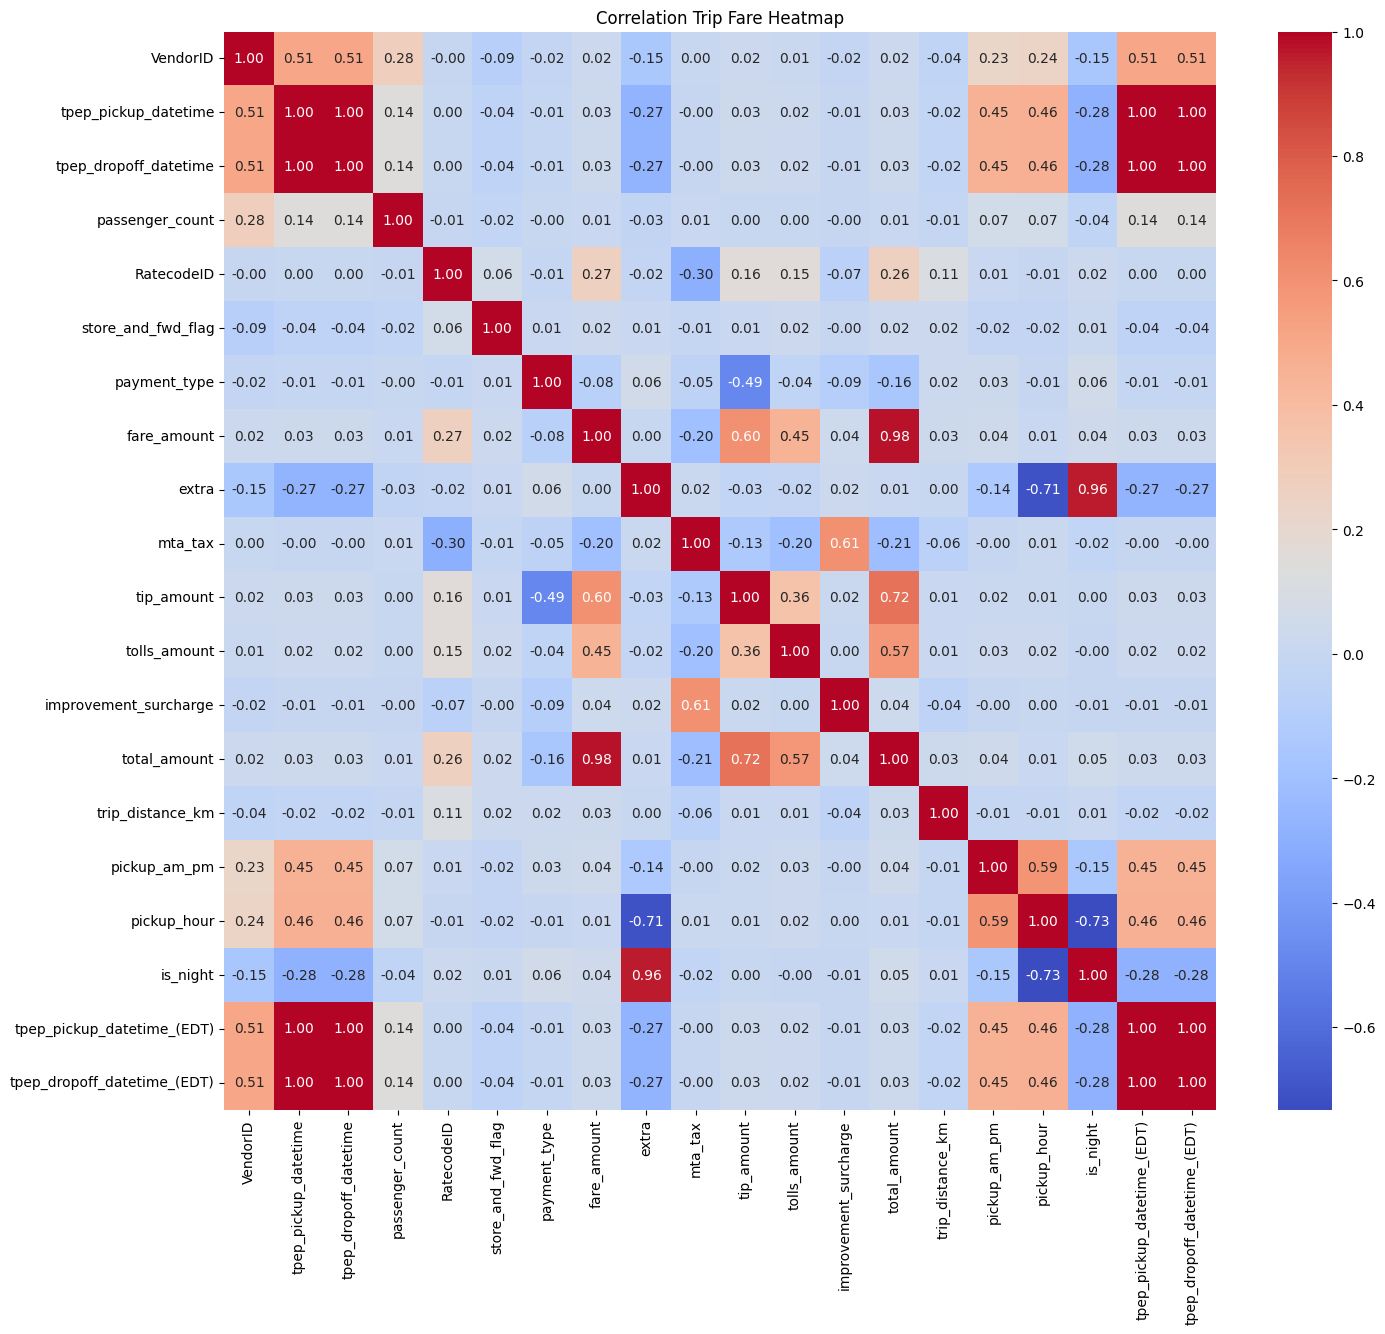

In [118]:

df_copy = df.copy()

# Encode Categorical Data

from sklearn.preprocessing import LabelEncoder
code = LabelEncoder()

for i in df_copy.select_dtypes(include="object").columns:
  df_copy[i] = code.fit_transform(df_copy[i])


# -----------------------------------------------------------------------------
#                               Correlation Test
# ---------------------------------------------------------------------------

import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------
# Calculate correlation for Trip Fare
# ----------------------------------------
corr = df_copy.corr()

# Plot heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Trip Fare Heatmap")
plt.show()



# ** Exploratory Data Analysis (EDA)**

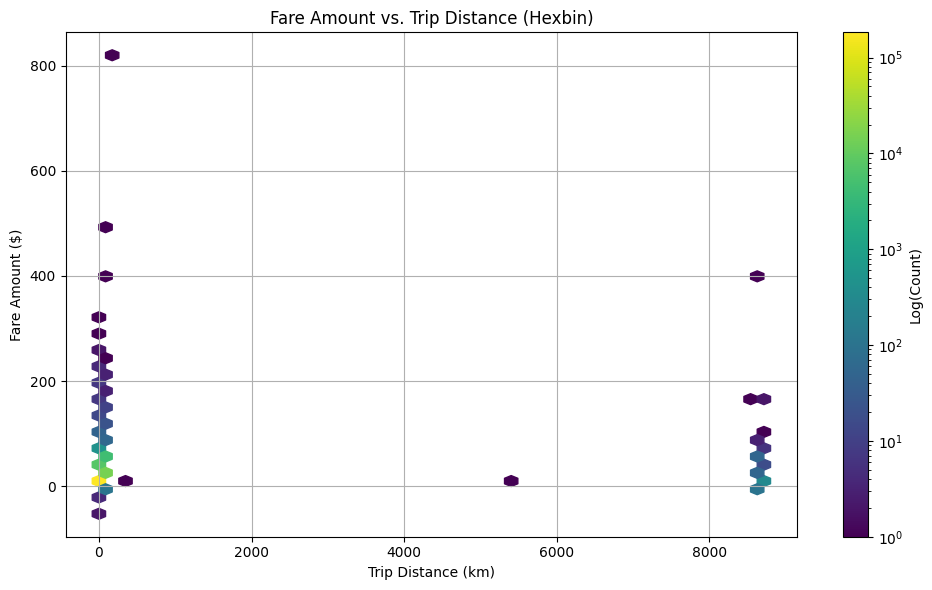

In [119]:
#  Fare vs. Distance: Exploratory Data Analysis

# ----------------------------
# Step 3: Scatter Plot (Fare vs. Distance)
# ----------------------------
plt.figure(figsize=(10, 6))
plt.hexbin(
    df['trip_distance_km'],
    df['fare_amount'],
    gridsize=50,
    cmap='viridis',
    bins='log'
)
plt.colorbar(label='Log(Count)')
plt.title('Fare Amount vs. Trip Distance (Hexbin)')
plt.xlabel('Trip Distance (km)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

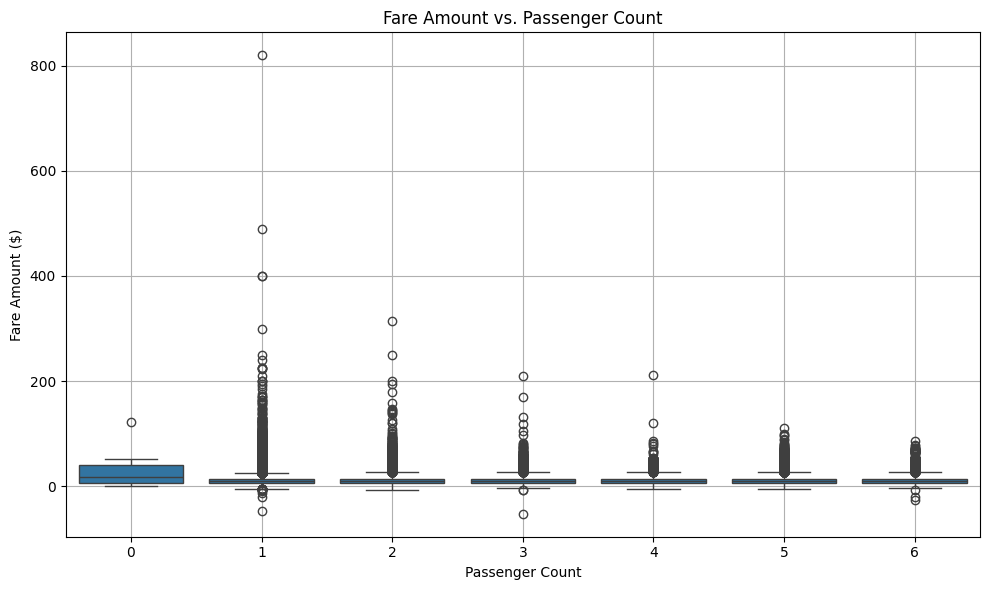

In [120]:
# ----------------------------
# Plot: Fare vs. Passenger Count
# ----------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='passenger_count', y='fare_amount')
plt.title('Fare Amount vs. Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Hypothesis testing**

In [121]:
df.to_csv("taxi_fare_cleaned.csv")

In [122]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance_km',
       'pickup_am_pm', 'pickup_hour', 'is_night', 'tpep_pickup_datetime_(EDT)',
       'tpep_dropoff_datetime_(EDT)'],
      dtype='object')

In [123]:
catergory = [
       'passenger_count', 'RatecodeID','store_and_fwd_flag',
       'payment_type','improvement_surcharge', 'total_amount',
        'pickup_am_pm', 'is_night']

continous = ['VendorID',
            'fare_amount', 'extra', 'mta_tax', 'tip_amount','tolls_amount',
             'trip_distance_km','pickup_hour'
             ]

# **Data Transformation**

In [124]:

from scipy import stats

#continious vs continious
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.1:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [125]:


#cat vs cat
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.1 else False

In [126]:
#continious(d1) vs cat(d2)
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        # Check if the category has more than one data point
        if len(df[d1][df[d2]==i]) > 1:
            data[i]=df[d1][df[d2]==i]
    # Check if there are at least two groups with more than one data point
    if len(data) < 2:
        return False  # Cannot perform ANOVA with less than two groups
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.1 else True


In [127]:

final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continous) and (j in continous):
            result=two_sample(df[i],df[j])
        elif (i in continous) and (j in catergory):
            result=annova_test(i,j)
        elif (i in catergory) and (j in continous):
            result=annova_test(j,i)
        elif (i in catergory) and (j in catergory):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [128]:
final_df = pd.DataFrame(final)
final_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_distance_km,pickup_am_pm,pickup_hour,is_night,tpep_pickup_datetime_(EDT),tpep_dropoff_datetime_(EDT)
VendorID,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
tpep_pickup_datetime,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
tpep_dropoff_datetime,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
passenger_count,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
RatecodeID,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
store_and_fwd_flag,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
payment_type,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,1,1,1
fare_amount,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
extra,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1
mta_tax,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


<Axes: >

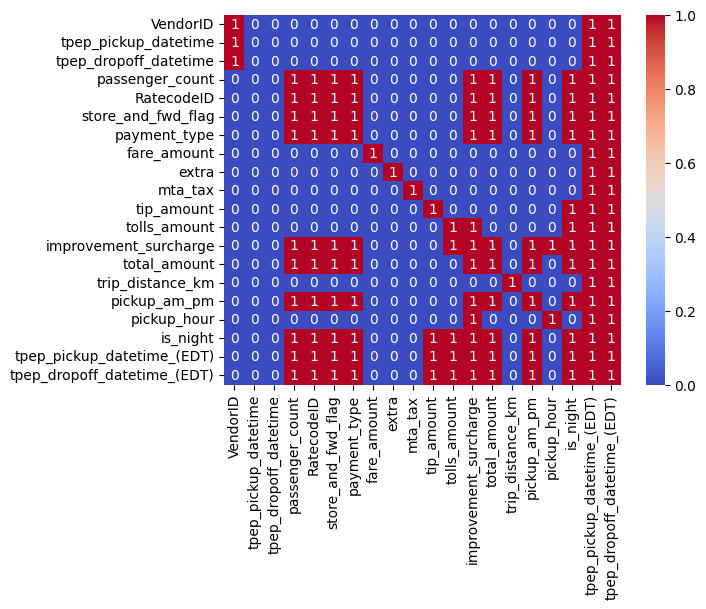

In [129]:
import seaborn as sns
sns.heatmap(final_df,annot=True,cmap="coolwarm")

# **Train the model ML**

In [136]:
df_copy.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'trip_distance_km',
       'pickup_am_pm', 'pickup_hour', 'is_night', 'tpep_pickup_datetime_(EDT)',
       'tpep_dropoff_datetime_(EDT)'],
      dtype='object')

In [137]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype                     
---  ------                       --------------   -----                     
 0   VendorID                     212345 non-null  int64                     
 1   tpep_pickup_datetime         212345 non-null  datetime64[ns, UTC]       
 2   tpep_dropoff_datetime        212345 non-null  datetime64[ns, UTC]       
 3   passenger_count              212345 non-null  int64                     
 4   RatecodeID                   212345 non-null  int64                     
 5   store_and_fwd_flag           212345 non-null  int64                     
 6   payment_type                 212345 non-null  int64                     
 7   fare_amount                  212345 non-null  float64                   
 8   extra                        212345 non-null  float64                   
 9   mta_tax                   

In [138]:
y = df_copy['total_amount']
x = df_copy.drop('total_amount',axis=1)

In [139]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((159258, 19), (53087, 19), (159258,), (53087,))

In [141]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score

# Drop datetime columns before training
x_train = x_train.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'tpep_pickup_datetime_(EDT)', 'tpep_dropoff_datetime_(EDT)'])
x_test = x_test.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'tpep_pickup_datetime_(EDT)', 'tpep_dropoff_datetime_(EDT)'])

model = RandomForestRegressor().fit(x_train,y_train)
y_pred = model.predict(x_test)
print(mean_absolute_error(y_test,y_pred))
print(mean_absolute_percentage_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print(r2_score(y_test,y_pred))

0.022797737675931486
1527017787.6448643
0.17283819610959278
0.9990326815683305
